In [1]:
from IPython.display import Image, YouTubeVideo, Latex
import scipy.stats as st


In [2]:
rv = st.multinomial(10, [1 / 3] * 3)
rv.rvs(4)


array([[2, 5, 3],
       [1, 6, 3],
       [3, 2, 5],
       [3, 4, 3]])

In [3]:
rv.rvs(10).sum(axis=1)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [4]:
n = 684
p1 = p2 = 1 / 4
p3 = 1 / 2
v = n * p3 * (1 - p3)
z = (128 - n * p1) ** 2 / v + (136 - n * p2) ** 2 / v
1 - st.chi2(2).cdf(z)


0.00012486166748693073

# NOTE: Add CLT & Chi^2 Notes above!
**0.00012486166748693073** is very low and suggests that the hypothesized multinomial distribution isnt a good one for this data.

## NOTE: Add Poison distribution notes here!

In [5]:
x = st.poisson(3)
print(x.pmf(6))


0.05040940672246224


In [6]:
x = st.expon(0, 5)  # create random variable obj
print(1 - x.cdf(10))


0.1353352832366127


In [7]:
x = st.gamma(2, scale=1 / 5)  # rv obj
print(x.cdf(1))


0.9595723180054873


In [8]:
x = st.beta(1, 1)  # rv obj
print(x.cdf(1))


1.0


In [9]:
d = st.dirichlet([1, 1, 1])  # rv obj
d.rvs(3)


array([[0.1262748 , 0.39892586, 0.47479934],
       [0.4751036 , 0.01129475, 0.51360165],
       [0.10163071, 0.3116474 , 0.58672189]])

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = d.rvs(1_000)


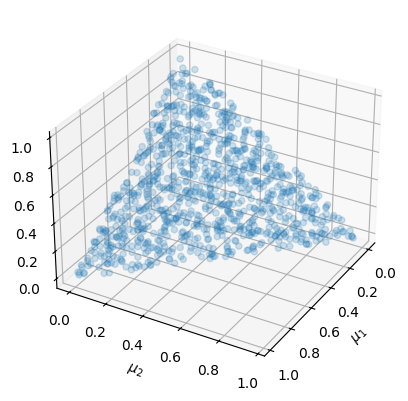

In [11]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
_ = ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker="o", alpha=0.2)
ax.view_init(30, 30)  # elevation, azimuth
_ = ax.set_xlabel(r"$\mu_1$")
_ = ax.set_ylabel(r"$\mu_2$")
_ = ax.set_zlabel(r"$\mu_3$")
fig.savefig("Dirichlet_001.png")


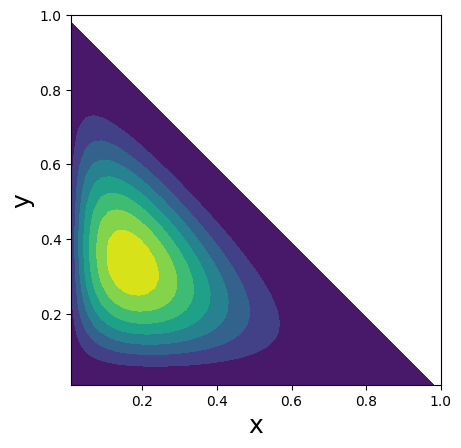

In [12]:
import numpy as np
from matplotlib.pylab import cm

X, Y = np.meshgrid(np.linspace(0.01, 1, 50), np.linspace(0.01, 1, 50))

d = st.dirichlet([2, 3, 4])

idx = X + Y < 1

f = d.pdf(np.vstack([X[idx], Y[idx], 1 - X[idx] - Y[idx]]))

Z = idx * 0 + np.nan
Z[idx] = f

fig, ax = plt.subplots()
_ = ax.contourf(X, Y, Z, cmap=cm.viridis)
ax.set_aspect(1)
_ = ax.set_xlabel("x", fontsize=18)

_ = ax.set_ylabel("y", fontsize=18)

fig.savefig("Dirichlet_002.png")


In [13]:
import random

n = 2
p = 1 / 3
nc = 0
seq = []
while nc < n:
    (v,) = random.choices([0, 1], [1 - p, p])
    seq.append(v)
    nc += v == 1

seq, len(seq)


([1, 0, 0, 0, 1], 5)

In [14]:
from collections import Counter

n = 2
p = [1 / 3, 1 / 2]
items = ["a", "b", "F"]
nc = 0
seq = []
while nc < n:
    (v,) = random.choices(items, p + [1 - sum(p)])
    seq.append(v)
    nc += v == "F"

c = Counter(seq)
print(c)


Counter({'b': 6, 'a': 2, 'F': 2})


In [15]:
from scipy.special import factorial


def negative_multinom_pdf(p, n):
    assert len(n) == len(p)
    term = [i**j for i, j in zip(p, n)]
    num = np.prod(term) * (1 - sum(p)) * factorial(sum(n))
    den = np.prod([factorial(i) for i in n])
    return num / den


In [16]:
negative_multinom_pdf([1 / 3, 1 / 2], [c["a"], c["b"]])

0.008101851851851853